In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp
import yfinance as yf
# 한글폰트 출력 가능 코드
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

df = pd.read_csv("./dataset/pre_month_kospi.csv",encoding="cp949")
df

,날짜,종가,등락율,개인순매수,외국인순매수,기관순매수
0,2005-01-31,932.70,0.0121,-1202.0,-468.0,1670.0
1,2005-02-28,1011.36,0.0145,-365.0,2884.0,-2519.0
2,2005-03-31,965.68,0.0107,-659.0,215.0,444.0
3,2005-04-29,911.30,-0.0070,-807.0,-865.0,1671.0
4,2005-05-31,970.21,0.0012,-1100.0,79.0,1022.0
...,...,...,...,...,...,...
202,2021-11-30,2839.01,-0.0242,7338.0,-1332.0,-6400.0
203,2021-12-31,2839.01,-0.0242,7338.0,-1332.0,-6400.0
204,2022-01-31,2839.01,-0.0242,7338.0,-1332.0,-6400.0
205,2022-02-28,2699.18,0.0084,2908.0,966.0,-3801.0


In [9]:
mask =(df['날짜']>='2016-03-01')& (df['날짜']<='2019-01-01')
df = df.loc[mask]
df.reset_index(drop=True,inplace= True)


In [10]:
foreign_diff = df.diff(1)['Close'].dropna()
kospi_diff = pd.DataFrame(kospi_diff)
print('diff 후 \n', kospi_diff.head())


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [5]:
df_foreign = df['외국인순매수'].shift(1).dropna()
df_foreign_1 = pd.DataFrame(df_foreign)
df_foreign_1

,외국인순매수
1,-2100.0
2,639.0
3,-1296.0
4,4040.0
5,2115.0
6,204.0
7,-1558.0
8,97.0
9,2714.0
10,2714.0


C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '코스피 종가 분포')

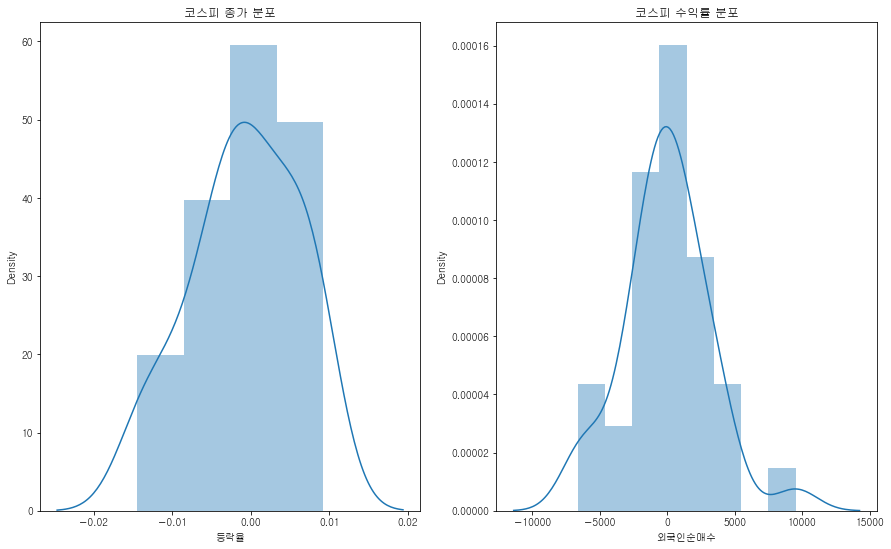

In [7]:
plt.figure(figsize= (15,9))
plt.subplot(1,2,2)
sns.distplot(df['외국인순매수'])
plt.title('코스피 수익률 분포')
plt.subplot(1,2,1)
sns.distplot(df['등락율'])
plt.title('코스피 종가 분포')


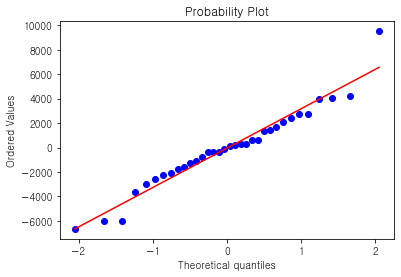

In [8]:
# 정규성 검정 (시각화)
from scipy.stats import probplot

# 시각화 
probplot(df['외국인순매수'],plot=plt) 
plt.show()

In [9]:
# shapiro 검정 시행
from scipy.stats import shapiro

test_stat, pval = shapiro(df['외국인순매수'])

if pval < .05:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
else:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')
    
# jarque_bera 검정 시행
from scipy.stats import jarque_bera

stats, pval = jarque_bera(pd.DataFrame(df['외국인순매수']))

if pval < .05:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
else:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')

p값이  25.37672520% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.
p값이  25.10596007% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.
